In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import skimage
from skimage import data
from matplotlib import pyplot as plt
import matplotlib as mpl

# %pylab inline
class MidpointNormalize(mpl.colors.Normalize):
    """
    class to help renormalize the color scale
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))




Bad key text.latex.preview in file /home/spock-the-wizard/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.4/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/spock-the-wizard/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.4/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/spock-the-wizard/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_

In [2]:
import os
from PIL import Image
import numpy as np

grad1 = f"examples/python/scripts/grad/test_was_v0/cone4_4.npy"
scene="head1"
sensor=30
grad1 = f"examples/python/scripts/grad/test_was_v0/{scene}_{sensor}.npy"
grad1_gt = f"examples/grad2/{scene}_sensor{sensor}_sigma_t[[52, 52, 52]]_param2_VaeSub_delta5_FD_nolegend.png"
grad1_img = f"examples/grad2/{scene}_sensor{sensor}_sigma_t[[52, 52, 52]]_param2_VaeSub_delta5_FD_1.png"

img = np.load(grad1)[...,None]
img_gt = Image.open(grad1_gt)
img_img = Image.open(grad1_img)

img *= 1000
img.shape
img[img!=0]
print(img.max())
print(img.min())
# tmp = img.astype('float64')
# tmp.max()
# np.unique(img)

0.07623015456677724
-0.05665153730660677


0.07623015456677724


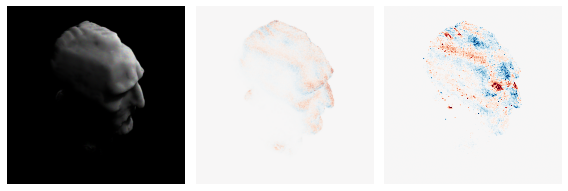

In [3]:
thres = 0.006510 #50151

from mpl_toolkits.axes_grid1 import make_axes_locatable

# img *= 10000
cmax = max(img.max(),abs(img.min()))
print(cmax)
# img[img>thres] = thres
# img[img<-thres] = -thres

# img[img >0.0] = +1.0
# img[img<0.0] = -1.0
# print(np.unique(img))
cmax = min(cmax,thres)
norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)

f, axarr = plt.subplots(nrows=1, ncols=3, figsize=(8,8), tight_layout=True)
axarr[0].imshow(img_img)
axarr[0].axis('off')
axarr[1].imshow(img_gt)
axarr[1].axis('off')

img_ = axarr[2].imshow(img,cmap='RdBu_r',norm=norm)
axarr[2].axis('off')
plt.show()

5
0.022128172
0.05128946900367737
0.027739583
0.03375949710607529
0.017004743
0.029113454123338062
0.033941977
0.07141907513141632
0.03455045
0.062164202


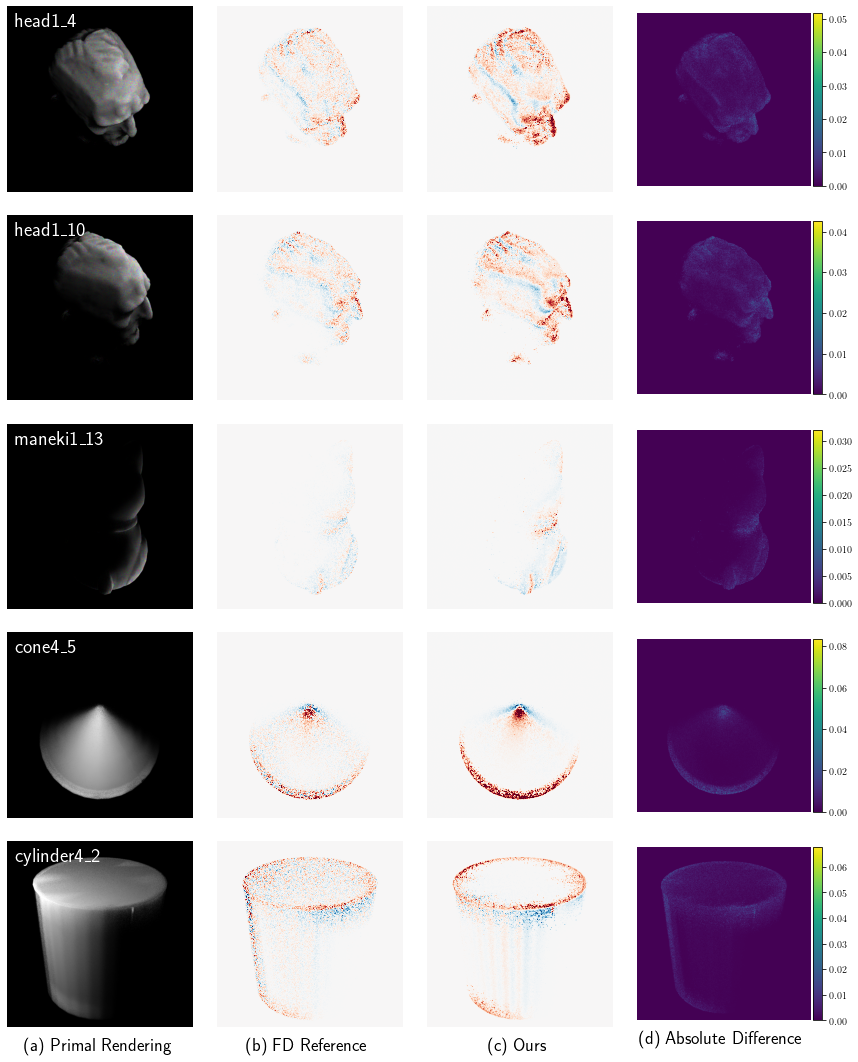

In [155]:
import os
from PIL import Image
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
delta=5
sigmaT = 52
exp=208
exp2=exp
# exp2=76
grad_dir = "grad2" if exp<36 else "grad3"
suffix="basic"
# suffix="plane"
suffix="all"
# suffix="complex"
grad_dirs = ["grad2",]
scenes = ['cube','plane','cone4','sphere1','cylinder4','pyramid4']
# scenes = ['plane']
scenes = ['head1','kettle1','duck','maneki1','pig1','horse','botijo','cube','plane','cone4','sphere1','cylinder4','pyramid4']
# scenes=['head1','kettle1','duck','maneki1','pig1','horse','botijo']
sensors = np.arange(50)
# sensors = [2,22]
list_imgs = []
list_grad_fds = []
list_grads = []
list_fds = []
list_scenes = []

for scene in scenes:
    for sensor in sensors:
        for grad_dir in grad_dirs:
            if exp <= 131:
                grad = f"examples/python/scripts/grad/test_was_v{exp}/{scene}_{sensor}.npy"
                grad_fd = f"examples/python/scripts/grad/test_was_v{exp2}/{scene}_{sensor}_fd.npy"
            else:
                grad = f"examples/python/scripts/grad/test_was_v{exp}/{scene}_{sensor}_{delta}.npy"
                grad_fd = f"examples/python/scripts/grad/test_was_v{exp2}/{scene}_{sensor}_{delta}_fd.npy"
                
            fd = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_VaeSub_delta{delta}_FD_nolegend.png"
            img = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_VaeSub_delta{delta}_FD_0.png"
            # fd = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_HeterSub_delta{delta}_FD_nolegend.png"
            # img = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_HeterSub_delta{delta}_FD_0.png"
            if not os.path.exists(grad_fd) or not os.path.exists(img) or not os.path.exists(grad):
                continue
            grad_ = np.load(grad)[...,None]
            grad_fd = np.load(grad_fd)[...,None]
            
            img_ = Image.open(img)
            list_grads.append(grad_)
            list_grad_fds.append(grad_fd)
            # list_fds.append(fd_)
            list_imgs.append(img_)
            list_scenes.append((scene,sensor))
print(len(list_imgs))
plt.rcParams['text.usetex'] = True
f, axarr = plt.subplots(nrows=len(list_imgs), ncols=4, figsize=(3*4,len(list_imgs)*3), tight_layout=True)
for idx,(img,fd,grad) in enumerate(zip(list_imgs,list_grad_fds,list_grads)):
    name,sensor = list_scenes[idx]
    # print(idx)
    axarr[idx,0].imshow(img)
    # print(name)
    axarr[idx,0].text(20,17,f"{name}_{sensor}",fontsize=20, color='white', ha='left', va='top')
   
    thres = 0.006510 #50151
    cmax = max(fd.max(),abs(fd.min()))
    print(cmax)
    cmax = min(cmax,thres)
    norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    axarr[idx,1].imshow(fd,cmap='RdBu_r',norm=norm)

    thres = 0.006 #50151   
    # grad = grad / 0.05
    cmax = max(grad.max(),abs(grad.min()))
    print(cmax)
    cmax = min(cmax,thres)
    # cmax=thres
    norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    axarr[idx,2].imshow(grad,cmap='RdBu',norm=norm)
     
    diff = abs(grad-fd)
    # norm = MidpointNormalize(vmin=-diff.max(),vmax=diff.max(),midpoint=0.0)
    divider = make_axes_locatable(axarr[idx,3])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    im = axarr[idx,3].imshow(diff,cmap='viridis') #,norm=norm)
    f.colorbar(im, cax=cax, orientation='vertical')
    
    axarr[idx,0].axis('off')
    axarr[idx,1].axis('off')
    axarr[idx,2].axis('off')
    axarr[idx,3].axis('off')
    
# axarr[idx,0].text(0,199,'hi',horizon)
fs = 18
idx = len(list_imgs)-1
axarr[idx,0].text(250,540,f"(a) Primal Rendering",fontsize=fs, ha='center', va='top')
axarr[idx,1].text(250,540,f"(b) FD Reference",fontsize=fs, ha='center', va='top')
if exp in [175]:
    axarr[idx,2].text(250,540,f"(c) Deng",fontsize=fs, ha='center', va='top')
else:
    axarr[idx,2].text(250,540,f"(c) Ours",fontsize=fs, ha='center', va='top')
axarr[idx,3].text(250,540,f"(d) Absolute Difference",fontsize=fs, ha='center', va='top')
plt.show()
f.savefig(f'was_v{exp}_{suffix}_{sigmaT}_{delta}.png')
 

# Figure: Boundary + Interior 

3
fd 0.022128174
(512, 512, 1) (512, 512, 1)
total 0.55050766
fd 0.029175302
(512, 512, 1) (512, 512, 1)
total 0.25213122
fd 0.02819173
(512, 512, 1) (512, 512, 1)
total 0.20959264


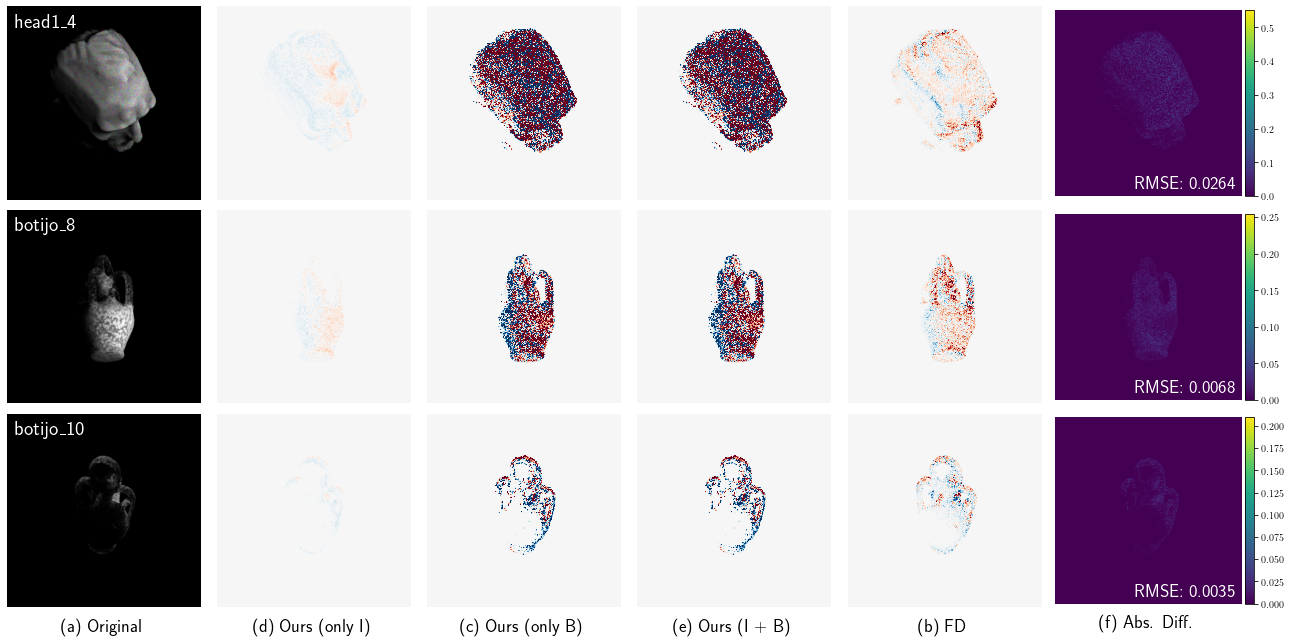

In [99]:
import os
from PIL import Image
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
delta=5
sigmaT = 52
exp=197
exp2=exp
# exp2=76
grad_dir = "grad2" if exp<36 else "grad3"
suffix="basic"
# suffix="plane"
suffix="all"
suffix="complex"
grad_dirs = ["grad2",]
scenes = ['cube','plane','cone4','sphere1','cylinder4',] #'pyramid4']
# scenes = ['plane']
# scenes = ['head1','kettle1','duck','maneki1','pig1','horse','botijo','cube','plane','cone4','sphere1','cylinder4','pyramid4']
scenes=['head1','kettle1','duck','maneki1','pig1','horse','botijo']
sensors = np.arange(50)
# sensors = [2,22]
list_imgs = []
list_grad_fds = []
list_grads = []
list_grads_ints = []
list_fds = []
list_scenes = []

##### Params #############
weight_B = 0.0001 # 0.0001
weight_I =50 # 50
thres = 0.005

# Figure Drawing Params
idx_org = 0
idx_onlyB = 2
idx_onlyI = 1
idx_total=3
idx_FD =4
idx_diff=5
fig_size = 3
fs = 18
##########################

for scene in scenes:
    for sensor in sensors:
        for grad_dir in grad_dirs:
            if exp <= 131:
                grad = f"examples/python/scripts/grad/test_was_v{exp}/{scene}_{sensor}.npy"
                grad_fd = f"examples/python/scripts/grad/test_was_v{exp2}/{scene}_{sensor}_fd.npy"
            else:
                grad = f"examples/python/scripts/grad/test_was_v{exp}/{scene}_{sensor}_{delta}.npy"
                grad_fd = f"examples/python/scripts/grad/test_was_v{exp2}/{scene}_{sensor}_{delta}_fd.npy"
                
            fd = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_VaeSub_delta{delta}_FD_nolegend.png"
            img = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_VaeSub_delta{delta}_FD_0.png"
            grad_int = f"examples/python/scripts/grad/test_was_v{exp}_int/{scene}_{sensor}_{delta}.npy"
            # fd = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_VaeSub_delta{delta}_FD_nolegend.png"
            # img = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_HeterSub_delta{delta}_FD_0.png"
            if not os.path.exists(grad_fd) and not os.path.exists(grad) and not os.path.exists(grad_int):
                continue
            if os.path.exists(grad):
                grad_ = np.load(grad)[...,None]
            else:
                grad_ = np.zeros((512,512,1))
            
            if os.path.exists(grad_fd):
                grad_fd = np.load(grad_fd)[...,None]
            else:
                grad_fd = np.zeros((512,512,1))
            
            if os.path.exists(grad_int):
                grad_int = np.load(grad_int)[...,None]
            else:
                grad_int = np.zeros((512,512,1))
            
            # if os.path.exists(img):
            img_ = Image.open(img)
            # else:
            #     img_ = np.zeros((512,512,3))
            list_grads.append(grad_)
            list_grad_fds.append(grad_fd)
            list_grads_ints.append(grad_int)
            # list_fds.append(fd_)
            list_imgs.append(img_)
            list_scenes.append((scene,sensor))
            
print(len(list_imgs))
plt.rcParams['text.usetex'] = True
f, axarr = plt.subplots(nrows=len(list_imgs), ncols=6, figsize=(fig_size*6,len(list_imgs)*fig_size), tight_layout=True)
for idx,(img,fd,grad,grad_int) in enumerate(zip(list_imgs,list_grad_fds,list_grads,list_grads_ints)):
    name,sensor = list_scenes[idx]
    # print(idx)
    axarr[idx,idx_org].imshow(img)
    # print(name)
    axarr[idx,idx_org].text(20,17,f"{name}_{sensor}",fontsize=20, color='white', ha='left', va='top')
   
    # thres = 0.006510 #50151
    cmax = max(fd.max(),abs(fd.min()))
    print("fd",cmax)
    cmax = min(cmax,thres)
    cmax = thres
    norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    axarr[idx,idx_FD].imshow(fd,cmap='RdBu_r',norm=norm)
    
    # thres = 60 #50151
    grad = grad * weight_B
    cmax = max(grad.max(),abs(grad.min()))
    # print(cmax)
    cmax = min(cmax,thres)
    cmax = thres
    norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    axarr[idx,idx_onlyB].imshow(grad,cmap='RdBu_r',norm=norm)
    
    # thres = 60 #50151
    grad_int = grad_int * weight_I
    cmax = max(grad_int.max(),abs(grad_int.min()))
    # print("int",cmax)
    cmax = min(cmax,thres)
    cmax = thres
    norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    axarr[idx,idx_onlyI].imshow(grad_int,cmap='RdBu_r',norm=norm)
    
    print(grad.shape, grad_int.shape)
    grad_total = grad + grad_int
    cmax = max(grad_total.max(),abs(grad_total.min()))
    print("total",cmax)
    cmax = min(cmax,thres)
    cmax = thres
    norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    axarr[idx,idx_total].imshow(grad_total,cmap='RdBu_r',norm=norm)
    
    # thres = 0.6 #50151    
    diff = abs(grad_total-fd)
    # norm = MidpointNormalize(vmin=-diff.max(),vmax=diff.max(),midpoint=0.0)
    divider = make_axes_locatable(axarr[idx,5])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    im = axarr[idx,idx_diff].imshow(diff,cmap='viridis') #,norm=norm)
    rmse =  np.sqrt((diff*diff).mean())
    f.colorbar(im, cax=cax, orientation='vertical')
    axarr[idx,5].text(500,500,f"RMSE: {rmse:.4f}",fontsize=fs ,ha='right', va='bottom',color='white')
    
    axarr[idx,0].axis('off')
    axarr[idx,1].axis('off')
    axarr[idx,2].axis('off')
    axarr[idx,3].axis('off')
    axarr[idx,4].axis('off')
    axarr[idx,5].axis('off')
    
# axarr[idx,0].text(0,199,'hi',horizon)

idx = len(list_imgs)-1
axarr[idx,0].text(250,540,f"(a) Original",fontsize=fs, ha='center', va='top')
axarr[idx,idx_FD].text(250,540,f"(b) FD",fontsize=fs, ha='center', va='top')
axarr[idx,idx_onlyB].text(250,540,f"(c) Ours (only B)",fontsize=fs, ha='center', va='top')
axarr[idx,idx_onlyI].text(250,540,f"(d) Ours (only I)",fontsize=fs, ha='center', va='top')
axarr[idx,idx_total].text(250,540,f"(e) Ours (I + B)",fontsize=fs, ha='center', va='top')
axarr[idx,5].text(250,540,f"(f) Abs. Diff.",fontsize=fs, ha='center', va='top')
plt.show()
f.savefig(f'was_v{exp}_{suffix}_{sigmaT}_{delta}_IandB.png')

# Figure: Comparison with Deng

3
fd 0.052867312
grad 21.19316
fd_deng 0.05121249
fd 0.05198915
grad 8.698824
fd_deng 0.09238241
fd 0.04799812
grad 8.225775
fd_deng 0.08812521


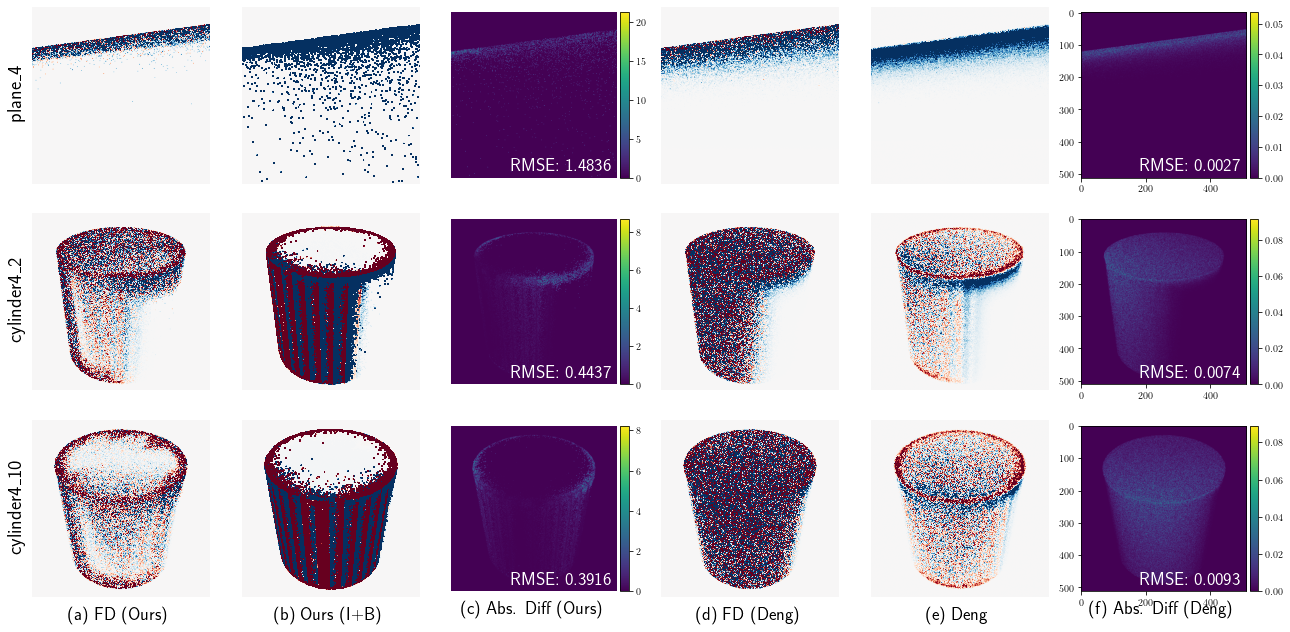

In [40]:
import os
from PIL import Image
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
delta=5
sigmaT = 52
exp=196
exp2=exp
# exp2=76
grad_dir = "grad2" if exp<36 else "grad3"
suffix="basic"
# suffix="plane"
# suffix="all"
# suffix="complex"
grad_dirs = ["grad2",]
scenes = ['cube','plane','cone4','sphere1','cylinder4',] #'pyramid4']
# scenes = ['plane']
# scenes = ['head1','kettle1','duck','maneki1','pig1','horse','botijo','cube','plane','cone4','sphere1','cylinder4','pyramid4']
# scenes=['head1','kettle1','duck','maneki1','pig1','horse','botijo']
sensors = np.arange(50)
# sensors = [2,22]
list_imgs = []
list_grad_fds = []
list_grads = []
list_grad_fds_deng = []
list_grads_deng = []
list_grads_ints = []
list_fds = []
list_scenes = []

##### Params #############
thres = 0.001

# Figure Drawing Params
idx_ours_FD=0
idx_ours_grad=1
idx_ours_diff=2
idx_deng_FD=3
idx_deng_grad=4
idx_deng_diff=5

fig_size = 3
fs = 18
##########################

for scene in scenes:
    for sensor in sensors:
        for grad_dir in grad_dirs:
            if exp <= 131:
                grad = f"examples/python/scripts/grad/test_was_v{exp}/{scene}_{sensor}.npy"
                grad_fd = f"examples/python/scripts/grad/test_was_v{exp2}/{scene}_{sensor}_fd.npy"
            else:
                grad = f"examples/python/scripts/grad/test_was_v{exp}/{scene}_{sensor}_{delta}.npy"
                grad_fd = f"examples/python/scripts/grad/test_was_v{exp2}/{scene}_{sensor}_{delta}_fd.npy"
                
            img = f"examples/{grad_dir}/{scene}_sensor{sensor}_sigma_t[[{sigmaT}, {sigmaT}, {sigmaT}]]_param2_VaeSub_delta{delta}_FD_0.png"
            grad_deng = f"examples/python/scripts/grad/test_was_v{exp}_deng/{scene}_{sensor}_{delta}.npy"
            grad_fd_deng = f"examples/python/scripts/grad/test_was_v{exp2}_deng/{scene}_{sensor}_{delta}_fd.npy"
            
            if not os.path.exists(grad_fd) or not os.path.exists(grad):
                continue
            grad_ = np.load(grad)[...,None]
            grad_fd = np.load(grad_fd)[...,None]
            grad_deng = np.load(grad_deng)[...,None]
            grad_fd_deng = np.load(grad_fd_deng)[...,None]
            
            if os.path.exists(img):
                img_ = Image.open(img)
            else:
                img_ = np.zeros((512,512,3))
            list_grads.append(grad_)
            list_grad_fds.append(grad_fd)
            list_grads_deng.append(grad_deng)
            list_grad_fds_deng.append(grad_fd_deng)
            # list_fds.append(fd_)
            list_imgs.append(img_)
            list_scenes.append((scene,sensor))
print(len(list_imgs))



plt.rcParams['text.usetex'] = True
f, axarr = plt.subplots(nrows=len(list_imgs), ncols=6, figsize=(fig_size*6,len(list_imgs)*fig_size), tight_layout=True)
for idx,(img,fd,grad,fd_deng,grad_deng) in enumerate(zip(list_imgs,list_grad_fds,list_grads,list_grad_fds_deng,list_grads_deng)):
    name,sensor = list_scenes[idx]
    axarr[idx,idx_org].imshow(img)
    axarr[idx,idx_org].text(-20,250,f"{name}_{sensor}",fontsize=20, ha='right', va='center',rotation=90)
   
    # thres = 0.006510 #50151
    cmax = max(fd.max(),abs(fd.min()))
    print("fd",cmax)
    cmax = min(cmax,thres)
    cmax = thres
    norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    axarr[idx,idx_ours_FD].imshow(fd,cmap='RdBu_r',norm=norm)
    
    # thres = 60 #50151    
    cmax = max(grad.max(),abs(grad.min()))
    # print(cmax)   
    print("grad",cmax)
    cmax = min(cmax,thres)
    cmax = thres
    norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    axarr[idx,idx_ours_grad].imshow(grad,cmap='RdBu_r',norm=norm)
    
    cmax = max(fd_deng.max(),abs(fd_deng.min()))
    print("fd_deng",cmax)
    cmax = min(cmax,thres)
    cmax = thres
    norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    axarr[idx,idx_deng_FD].imshow(fd_deng,cmap='RdBu_r',norm=norm)
    
    # thres = 60 #50151
    cmax = thres
    norm = MidpointNormalize(vmin=-cmax,vmax=cmax,midpoint=0.0)
    axarr[idx,idx_deng_grad].imshow(grad_deng,cmap='RdBu_r',norm=norm)
    
    # thres = 0.6 #50151    
    diff = abs(grad-fd)
    # norm = MidpointNormalize(vmin=-diff.max(),vmax=diff.max(),midpoint=0.0)
    divider = make_axes_locatable(axarr[idx,idx_ours_diff])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    im = axarr[idx,idx_ours_diff].imshow(diff,cmap='viridis') #,norm=norm)
    rmse =  np.sqrt((diff*diff).mean())
    f.colorbar(im, cax=cax, orientation='vertical')
    axarr[idx,idx_ours_diff].text(500,500,f"RMSE: {rmse:.4f}",fontsize=fs ,ha='right', va='bottom',color='white')
        
    diff = abs(grad_deng-fd_deng)
    # norm = MidpointNormalize(vmin=-diff.max(),vmax=diff.max(),midpoint=0.0)
    divider = make_axes_locatable(axarr[idx,idx_deng_diff])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    im = axarr[idx,idx_deng_diff].imshow(diff,cmap='viridis') #,norm=norm)
    rmse =  np.sqrt((diff*diff).mean())
    f.colorbar(im, cax=cax, orientation='vertical')
    axarr[idx,idx_deng_diff].text(500,500,f"RMSE: {rmse:.4f}",fontsize=fs ,ha='right', va='bottom',color='white')
    
    axarr[idx,0].axis('off')
    axarr[idx,1].axis('off')
    axarr[idx,2].axis('off')
    axarr[idx,3].axis('off')
    axarr[idx,4].axis('off')
    
idx = len(list_imgs)-1
axarr[idx,idx_ours_FD].text(250,540,f"(a) FD (Ours)",fontsize=fs, ha='center', va='top')
axarr[idx,idx_ours_grad].text(250,540,f"(b) Ours (I+B)",fontsize=fs, ha='center', va='top')
axarr[idx,idx_ours_diff].text(250,540,f"(c) Abs. Diff (Ours)",fontsize=fs, ha='center', va='top')
axarr[idx,idx_deng_FD].text(250,540,f"(d) FD (Deng)",fontsize=fs, ha='center', va='top')
axarr[idx,idx_deng_grad].text(250,540,f"(e) Deng",fontsize=fs, ha='center', va='top')
axarr[idx,idx_deng_diff].text(250,540,f"(f) Abs. Diff (Deng)",fontsize=fs, ha='center', va='top')
plt.show()
f.savefig(f'was_v{exp}_{suffix}_{sigmaT}_{delta}_DengCompare.png')
 

## Kernel Function

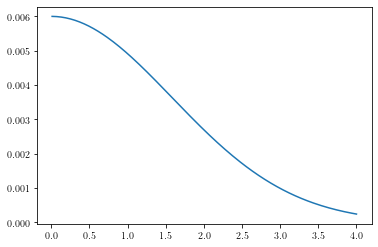

In [1107]:
import math
import numpy as np

import scipy.stats as stats
def weight(r_):
    maxDist = 0.02

    sigma = 0.006 #/ maxDist
    
    r = r_  / maxDist # / 15.0 
    a =3
    B=0
    D = 1/sigma*(1-np.exp(-r*r / sigma ))**a
    
    w = 1/sigma *(1-np.exp(-r*r/ sigma)) #*maxDist) #sigma)
    w = 1/(B+D)
    w = sigma *np.exp(-r_*r_ / 5) #*maxDist) #sigma)
    #stats.norm.pdf(r**3,0,sigma)
    return w
x = np.linspace(0.010, 4, 200)

fig, ax = plt.subplots()
y = weight(x)
plt.plot(x,y)


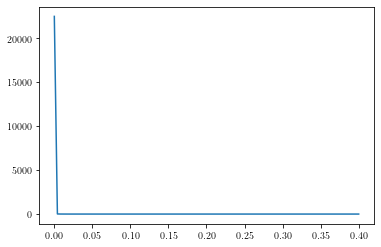

In [620]:
x = np.linspace(0.0001, 0.4, 100)

fig, ax = plt.subplots()
y = weight(x)
plt.plot(x,y)


In [32]:
%matplotlib ipympl
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

import mpl_interactions.ipyplot as iplt

### Check distribution

In [915]:
# data = img.reshape(-1,1)

import os
from PIL import Image
import numpy as np

grad1 = f"examples/python/scripts/grad/test_was_v0/cone4_4.npy"
scene="cone4"
sensor=1
exp=81
grad1 = f"examples/python/scripts/grad/test_was_v{exp}/{scene}_{sensor}.npy"
grad1_gt = f"examples/grad2/{scene}_sensor{sensor}_sigma_t[[52, 52, 52]]_param2_VaeSub_delta5_FD_nolegend.png"
grad1_img = f"examples/grad2/{scene}_sensor{sensor}_sigma_t[[52, 52, 52]]_param2_VaeSub_delta5_FD_1.png"
      
img = np.load(grad1)[...,None]
img_gt = Image.open(grad1_gt)
img_img = Image.open(grad1_img)

img *= 1000
img.shape
img[img!=0]
print(img.max())
print(img.min())
data = []
for d in img.reshape(-1,1):
    if d!= 0:
        data.append(d[0])
# data

75.99339634180069
-83.28702300786972


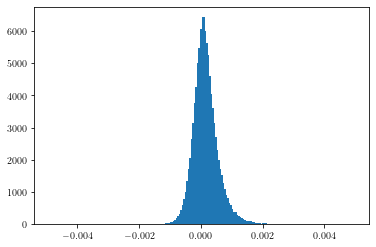

In [922]:
# max_ = 0.0000001 #img.max() - 0.8
# min_ = #img.min() + 0.2

# clip
thres = 0.005
data_= []
for d in data:
    if abs(d) < thres:
        data_.append(d)
data = data_
plt.hist(data,bins=200,) #range=(min_,max_))
plt.show() 

In [736]:
img.std()

0.0003346262